In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 100)
import warnings
warnings.filterwarnings(action='once')

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [4]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [5]:
#Vemos sus tipos
data.dtypes

id          int64 
keyword     object
location    object
text        object
target      int64 
dtype: object

In [6]:
#Vemos su forma
data.shape

(7613, 5)

In [7]:
data.count()
#a 61 tweets les falta el keyword

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [8]:
#traigo todos los que no tienen un keyword
sin_keyword = data.loc[data['keyword'].isna(),:]
sin_keyword

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [9]:
#De estos, veo cuantos son falsos
sin_keyword['target'].value_counts()

1    42
0    19
Name: target, dtype: int64

In [10]:
#Agrego columnas con las cantidades de caracteres y palabras
sin_keyword['length']=sin_keyword['text'].str.len()
sin_keyword['words']=sin_keyword['text'].str.count(' ') + 1
sin_keyword

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,keyword,location,text,target,length,words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,65,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,17
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,110,18
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,95,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,59,15
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,79,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,52,10


In [11]:
#Separo en verdaderos y falsos para un breve analisis
sin_keyword_falsos = sin_keyword.loc[sin_keyword['target']==0,:]
sin_keyword_veraces = sin_keyword.loc[sin_keyword['target']==1,:]

In [12]:
sin_keyword_falsos['length'].mean()

25.05263157894737

In [13]:
sin_keyword_falsos['words'].mean()


4.2105263157894735

In [14]:
sin_keyword_veraces['length'].mean()

96.02380952380952

In [15]:
sin_keyword_veraces['words'].mean()

14.761904761904763

# Busco candidatos para las keywords faltantes

1) Armo una lista de las keywords que aparecen en 'train'

In [16]:
keywords_unicas = data.loc[data['keyword'].notna(),:]['keyword'].unique()
keywords_unicas.size

221

In [17]:
#Obtenemos una lista de keywords unicas y reemplazamos los %20 por " "

keywords_unicas = keywords_unicas.tolist()
lista_aux = []
for keyword in keywords_unicas:
    keyword = keyword.replace("%20"," ")
    lista_aux.append(keyword)
keywords_unicas = lista_aux
keywords_unicas

['ablaze',
 'accident',
 'aftershock',
 'airplane accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown up',
 'body bag',
 'body bagging',
 'body bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge collapse',
 'buildings burning',
 'buildings on fire',
 'burned',
 'burning',
 'burning buildings',
 'bush fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical emergency',
 'cliff fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'desolation',
 'destroy',
 'des

2) Intento encontrar keywords en el texto de las filas sin keyword

In [18]:
con_candidatos_para_keyword = sin_keyword

In [19]:
candidatos = []
texts = con_candidatos_para_keyword['text'].tolist()
for text in texts:
    encontradas=""
    for keyword in keywords_unicas:
        if keyword in text.lower():
            if encontradas > "":
                encontradas = encontradas + ','
            encontradas = encontradas + keyword
    candidatos.append(encontradas)
    
con_candidatos_para_keyword['candidatos'] = candidatos
con_candidatos_para_keyword

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,id,keyword,location,text,target,length,words,candidatos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,13,earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,"fire,forest fire"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,22,evacuation
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,65,9,"evacuation,fire,wildfire"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,17,"fire,smoke,wildfire"
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,110,18,"fire,wildfire"
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,95,14,"disaster,flood,flooding"
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,59,15,fire
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,79,12,"emergency,evacuation"
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,52,10,tornado


In [20]:
#Me quedo con aquellas filas a las que se le puede asignar un keyword
para_asignar_keyword = con_candidatos_para_keyword.loc[con_candidatos_para_keyword['candidatos']>"",:]
para_asignar_keyword

,id,keyword,location,text,target,length,words,candidatos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,13,earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,"fire,forest fire"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,22,evacuation
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,65,9,"evacuation,fire,wildfire"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,17,"fire,smoke,wildfire"
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,110,18,"fire,wildfire"
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,95,14,"disaster,flood,flooding"
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,59,15,fire
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,79,12,"emergency,evacuation"
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,52,10,tornado


3) Selecciono y asigno keywords a los tweets que no tienen keyword

In [21]:
#Dada la poca cantidad de casos para tratar, selecciono la keyword mas significativa para cada uno, en orden
keywords_a_asignar = ['earthquake','forest fire','evacuation','wildfire','wildfire','wildfire','flooding','fire','evacuation','tornado','heat wave','flooding','flooding','flood','crash','suicide bomber','explode','flood','seismic','sirens','attack','earthquake','cyclone','heat wave','suicide bomber','loud bang','exploded','flood','thunderstorm','debris','collided','earthquake','evacuation','oil spill','siren','quarantine','evacuated','bomb','suicide bomber','tornado','bridge collapse','wild fires','volcano','collided','wildfire']
#Veo que no falte ninguna, los que pueden tener una keyword (tengan target 1 o 0) suman 45
len(keywords_a_asignar)

45

In [22]:
para_asignar_keyword['keyword']=keywords_a_asignar
para_asignar_keyword

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,keyword,location,text,target,length,words,candidatos
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,13,earthquake
1,4,forest fire,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,"fire,forest fire"
2,5,evacuation,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,22,evacuation
3,6,wildfire,NaN,"13,000 people receive #wildfires evacuation orders in California",1,65,9,"evacuation,fire,wildfire"
4,7,wildfire,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,17,"fire,smoke,wildfire"
5,8,wildfire,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,110,18,"fire,wildfire"
6,10,flooding,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,95,14,"disaster,flood,flooding"
7,13,fire,NaN,I'm on top of the hill and I can see a fire in the woods...,1,59,15,fire
8,14,evacuation,NaN,There's an emergency evacuation happening now in the building across the street,1,79,12,"emergency,evacuation"
9,15,tornado,NaN,I'm afraid that the tornado is coming to our area...,1,52,10,tornado


In [23]:
depurado = pd.read_csv('train.csv')
depurado.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [24]:
depurado['keyword'] = depurado['keyword'].fillna(para_asignar_keyword['keyword'])
depurado

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,forest fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,wildfire,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,wildfire,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,bridge collapse,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,wild fires,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,volcano,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,collided,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


4)Ahora hay 45 tweets adicionales que tienen keyword

In [25]:
depurado.count()

id          7613
keyword     7597
location    5080
text        7613
target      7613
dtype: int64

# Análisis

In [26]:
#jaja

In [27]:
depurado['keyword'] = depurado['keyword'].str.replace('%20',' ')

In [28]:
depurado.count()

id          7613
keyword     7597
location    5080
text        7613
target      7613
dtype: int64

In [29]:
depurado['keyword'].value_counts()

fatalities             45
armageddon             42
collided               42
deluge                 42
earthquake             42
                       ..
forest fire            20
epicentre              12
threat                 11
inundation             10
radiation emergency    9 
Name: keyword, Length: 221, dtype: int64

In [30]:
data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency    9 
Name: keyword, Length: 221, dtype: int64

In [42]:
cantidades = depurado['keyword'].value_counts()#.sort_index().plot(kind='bar', figsize=(20,10))

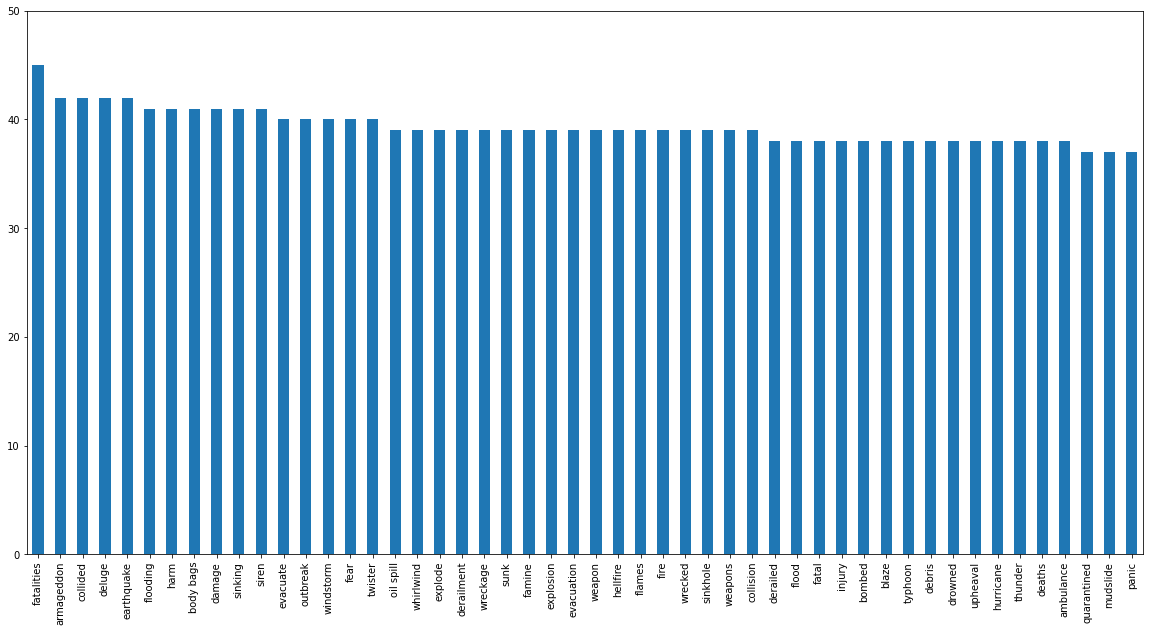

In [54]:
plt.ylim(top=50)
cantidades[:50].sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

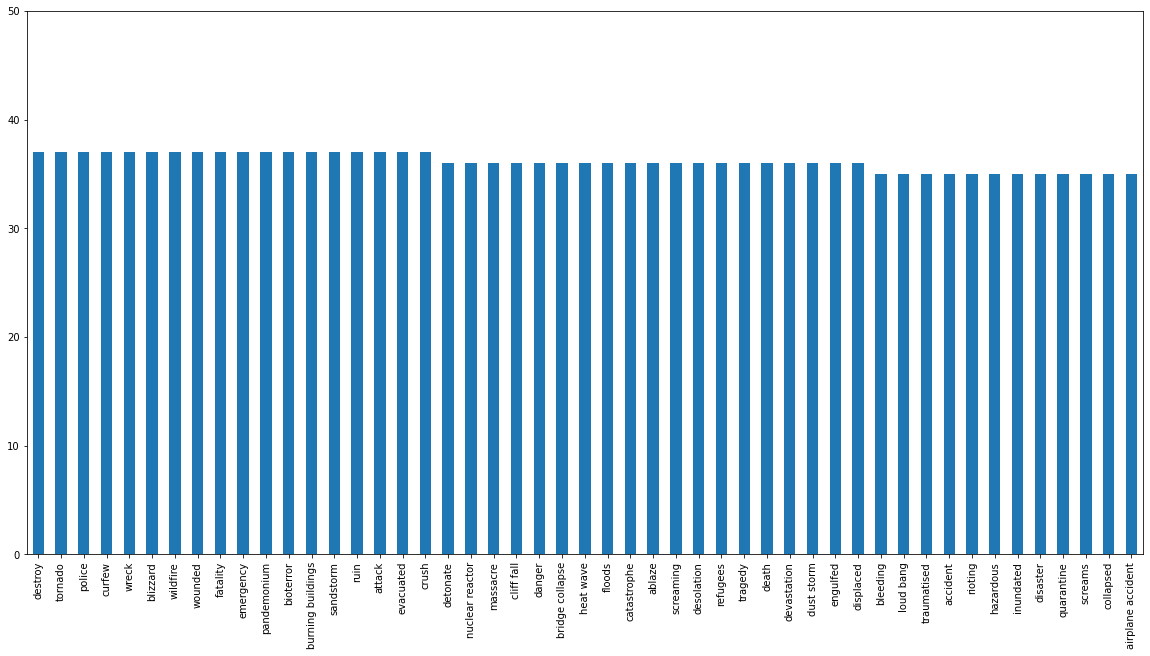

In [55]:
plt.ylim(top=50)
cantidades[51:100].sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

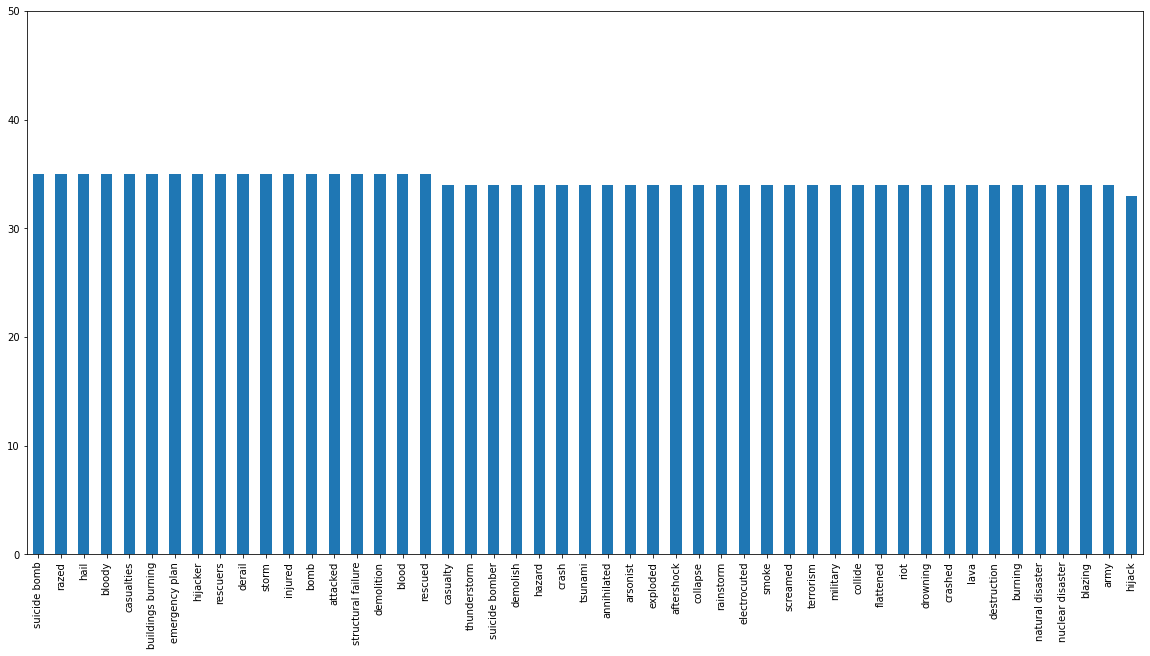

In [57]:
plt.ylim(top=50)
cantidades[101:150].sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

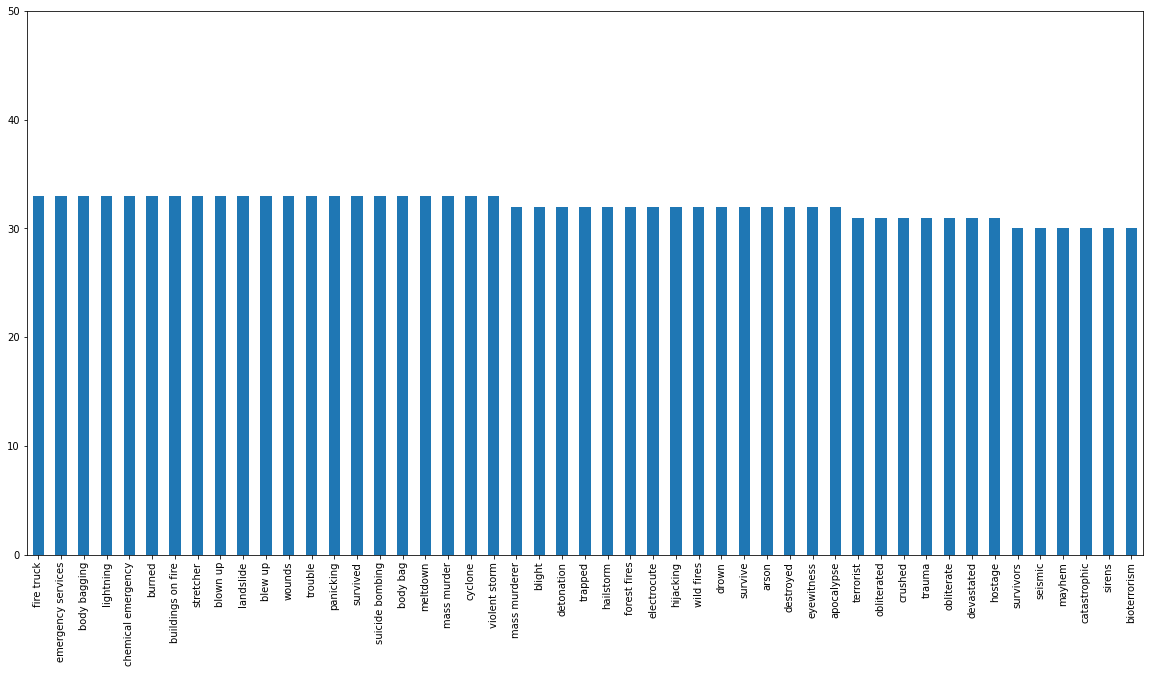

In [58]:
plt.ylim(top=50)
cantidades[151:200].sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

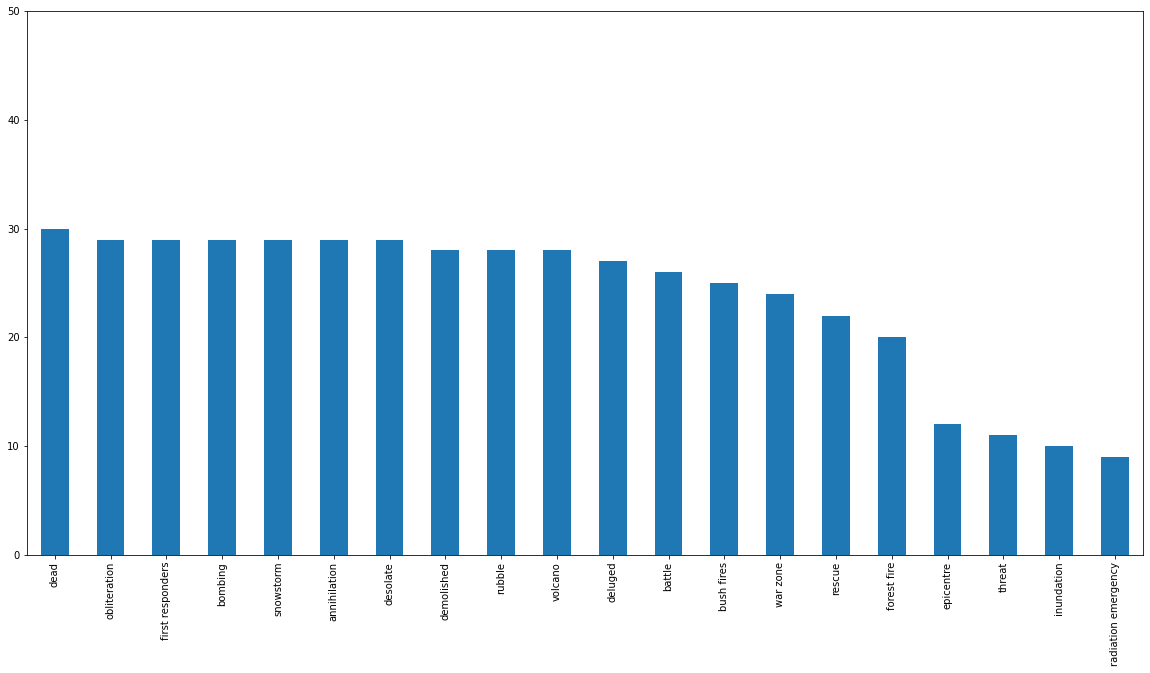

In [59]:
plt.ylim(top=50)
cantidades[201:250].sort_values(ascending=False).plot(kind='bar', figsize=(20,10))